In [20]:
import pandas as pd
import os 
import random
import subprocess

import dask.dataframe as dd
import seaborn as sns
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

from matplotlib import gridspec
import seaborn as sns
from statsmodels.stats.multitest import multipletests

In [8]:
pwd -P

'/carnegie/nobackup/scratch/tbellagio/gea_grene-net/wza_last_gen'

In [3]:
biovar = 'bio1'

In [9]:
kendall_corr = pd.read_csv(f'../kendall_tau_last_gen/kendall_corr_{biovar}.csv')

In [10]:
path = '/carnegie/nobackup/scratch/tbellagio/gea_grene-net/wza_last_gen/'

In [11]:
biovars = [
 'bio2',
 'bio3',
 'bio4',
 'bio5',
 'bio6',
 'bio7',
 'bio8',
 'bio9',
 'bio10',
 'bio11',
 'bio13',
 'bio14',
 'bio15',
 'bio16',
 'bio17',
 'bio19']

In [12]:
## create a dir 


# create sbatch files to submit on cedar server
shfiles = []
for biovar in biovars:
    seed = random.randint(1,100000000)
    file = f'wza_{biovar}.sh'
    cmd = f'python general_WZA_script_mod_polynomial_order7.py \
            --correlations ../kendall_tau_last_gen/kendall_corr_{biovar}.csv \
            --summary_stat K_tau_p --window "block" \
            --output wza_kendalltau_results_{biovar}_poly7.csv --sep ","'
    text = f'''#!/bin/bash
    #SBATCH --job-name=wza_{biovar}
    #SBATCH --time=1:00:00  # Time limit set to 4 days
    #SBATCH --ntasks=1
    #SBATCH --mem-per-cpu=30gb
    #SBATCH --output=wza_%j_{biovar}.out
    #SBATCH --mail-user=tbellagio@carnegiescience.edu
    #SBATCH --mail-type=FAIL
    
    module load python/3.11_conda
    conda activate /home/tbellagio/miniforge3/envs/pipeline_snakemake
    export LD_LIBRARY_PATH="/home/tbellagio/miniforge3/envs/run_baypass/lib:$LD_LIBRARY_PATH"
    cd /carnegie/nobackup/scratch/tbellagio/gea_grene-net/wza_last_gen
    {cmd}
    
    
    '''
    with open(file, 'w') as o:
        o.write("%s" % text)
    shfiles.append(file)

In [13]:
shfiles

['wza_bio2.sh',
 'wza_bio3.sh',
 'wza_bio4.sh',
 'wza_bio5.sh',
 'wza_bio6.sh',
 'wza_bio7.sh',
 'wza_bio8.sh',
 'wza_bio9.sh',
 'wza_bio10.sh',
 'wza_bio11.sh',
 'wza_bio13.sh',
 'wza_bio14.sh',
 'wza_bio15.sh',
 'wza_bio16.sh',
 'wza_bio17.sh',
 'wza_bio19.sh']

In [14]:
## now run the shfiles
for shfile in shfiles:
    # Submit each sbatch script to the SLURM scheduler
    subprocess.run(["sbatch", shfile], check=True)

Submitted batch job 61778
Submitted batch job 61779
Submitted batch job 61780
Submitted batch job 61781
Submitted batch job 61782
Submitted batch job 61783
Submitted batch job 61784
Submitted batch job 61785
Submitted batch job 61786
Submitted batch job 61787
Submitted batch job 61788
Submitted batch job 61789
Submitted batch job 61790
Submitted batch job 61791
Submitted batch job 61792
Submitted batch job 61793


In [15]:
biovar = 'bio5'

In [16]:
wza = pd.read_csv(f'wza_kendalltau_results_{biovar}_poly7.csv').reset_index()

In [16]:
wza['chrom'] = wza['gene'].str.split('_').str[0].astype(int)
wza['pos'] = wza['gene'].str.split('_').str[1].astype(int)

In [22]:
biovars = ['bio1', 'bio2',
 'bio3',
 'bio4',
 'bio5',
 'bio6',
 'bio7',
 'bio8',
 'bio9',
 'bio10',
 'bio11',
 'bio12',
 'bio13',
 'bio14',
 'bio15',
 'bio16',
 'bio17',
 'bio18',
 'bio19']

In [23]:
sns.set_context("talk")

/tmp/ipykernel_1982176/313494684.py:49: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax1.scatter(


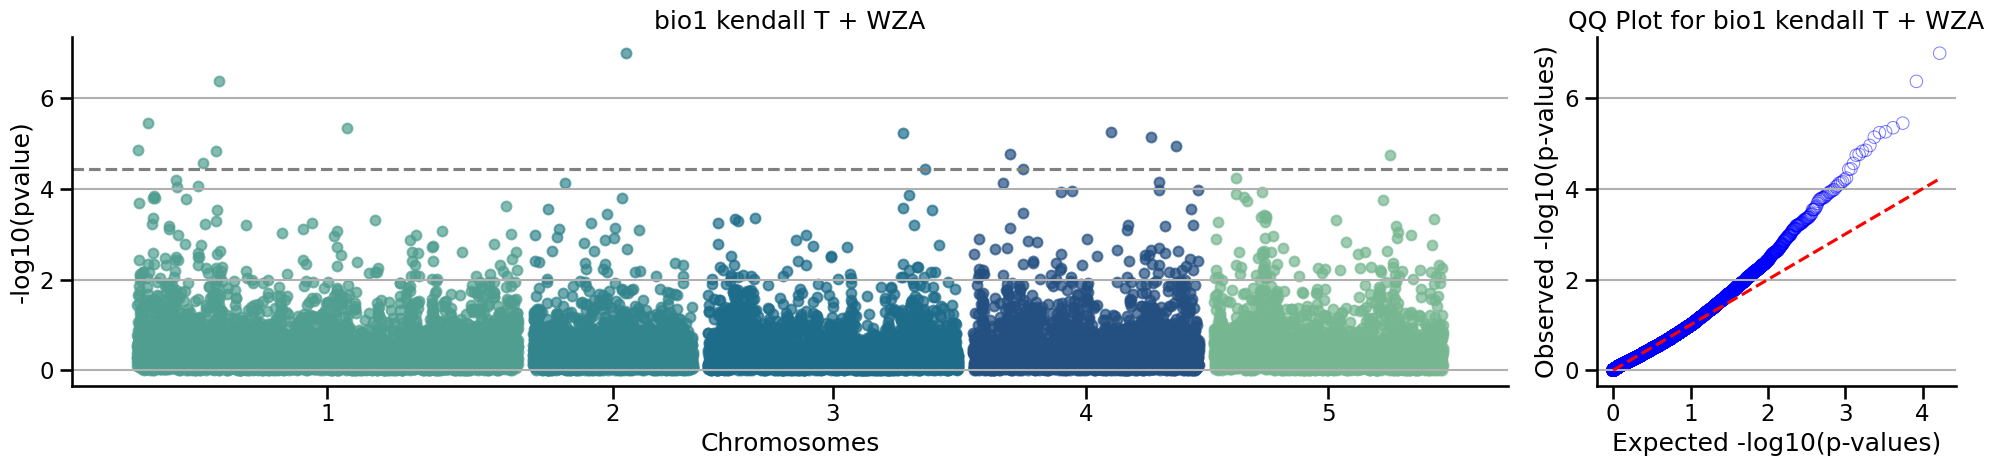

/tmp/ipykernel_1982176/313494684.py:49: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax1.scatter(


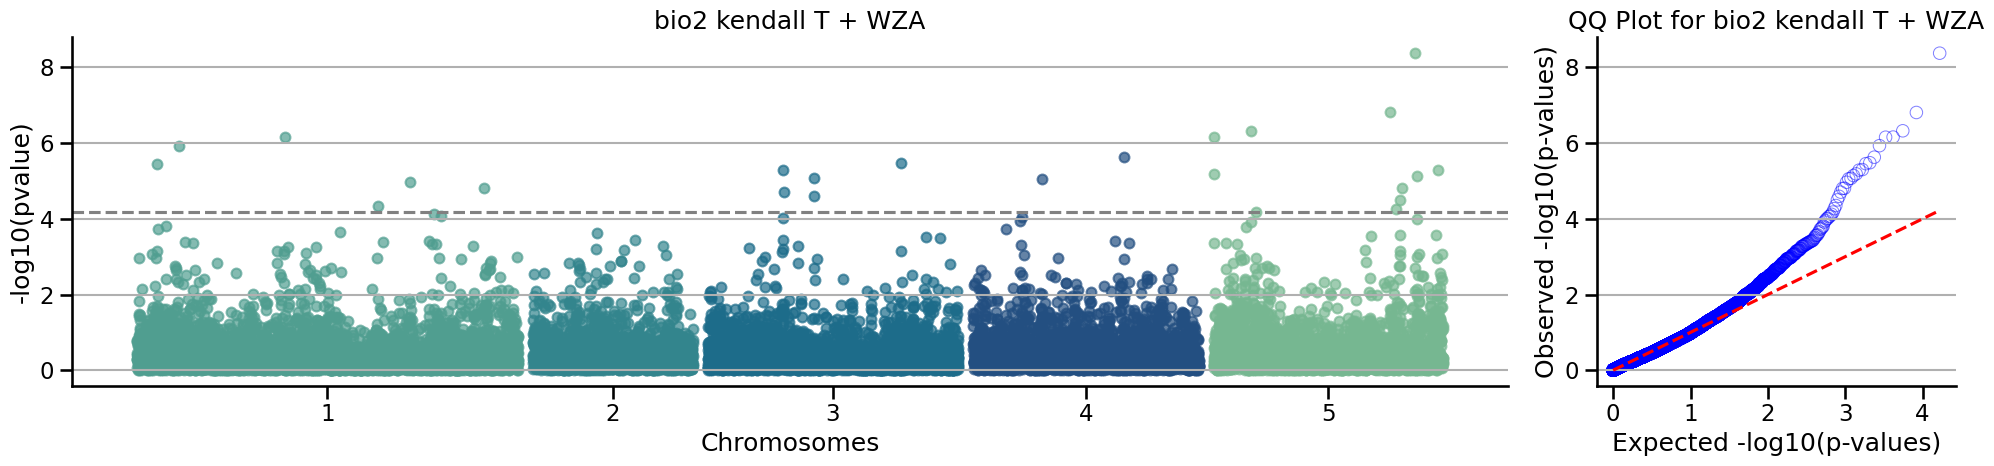

/tmp/ipykernel_1982176/313494684.py:49: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax1.scatter(


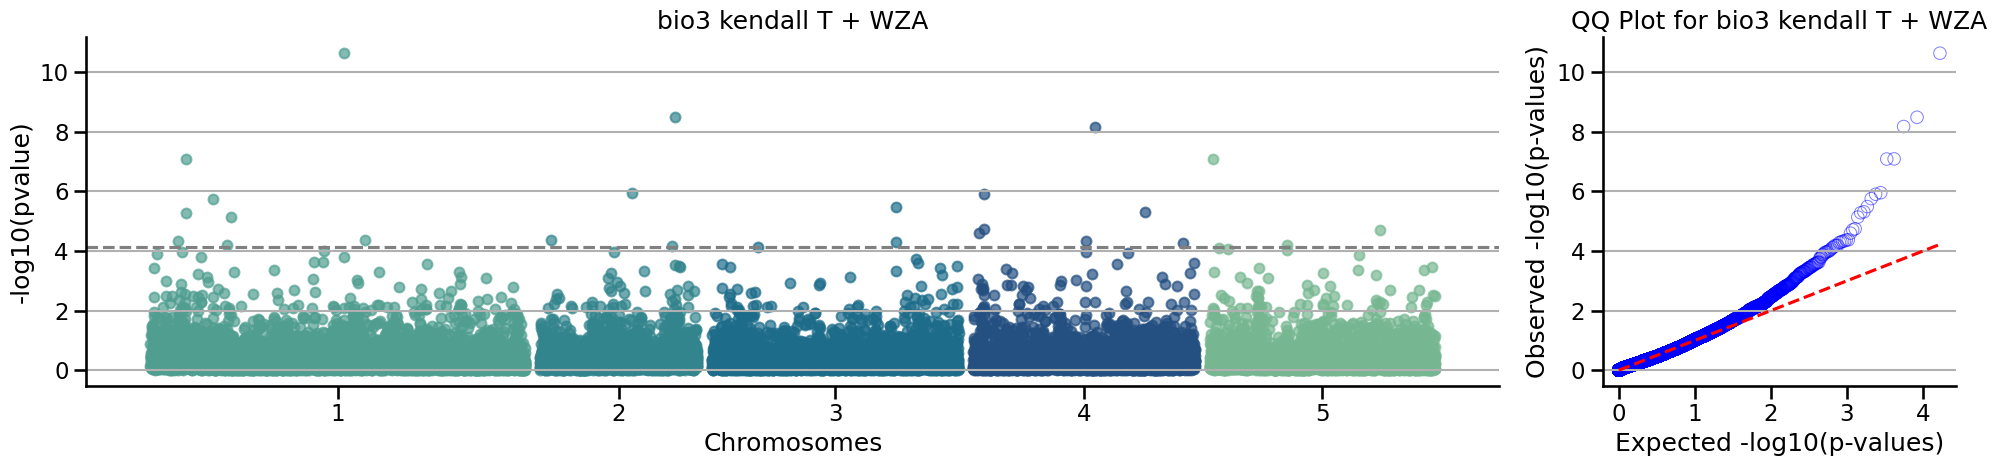

/tmp/ipykernel_1982176/313494684.py:49: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax1.scatter(


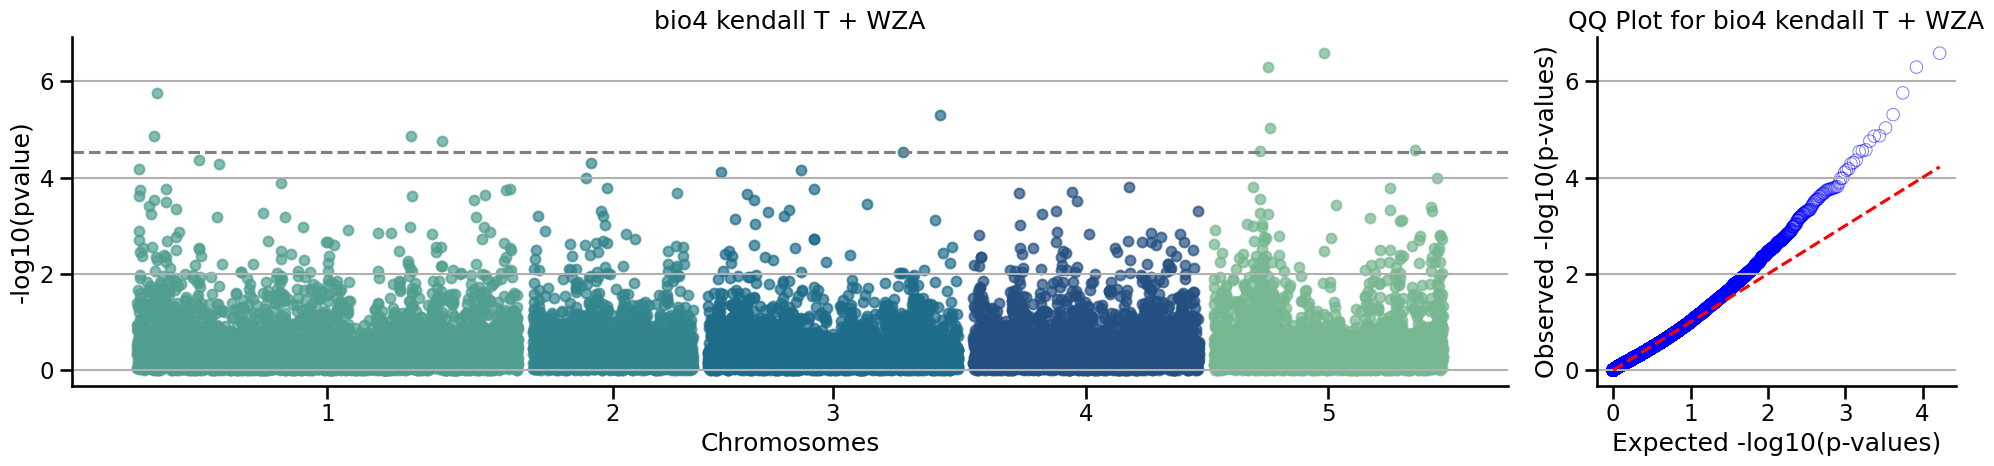

/tmp/ipykernel_1982176/313494684.py:49: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax1.scatter(


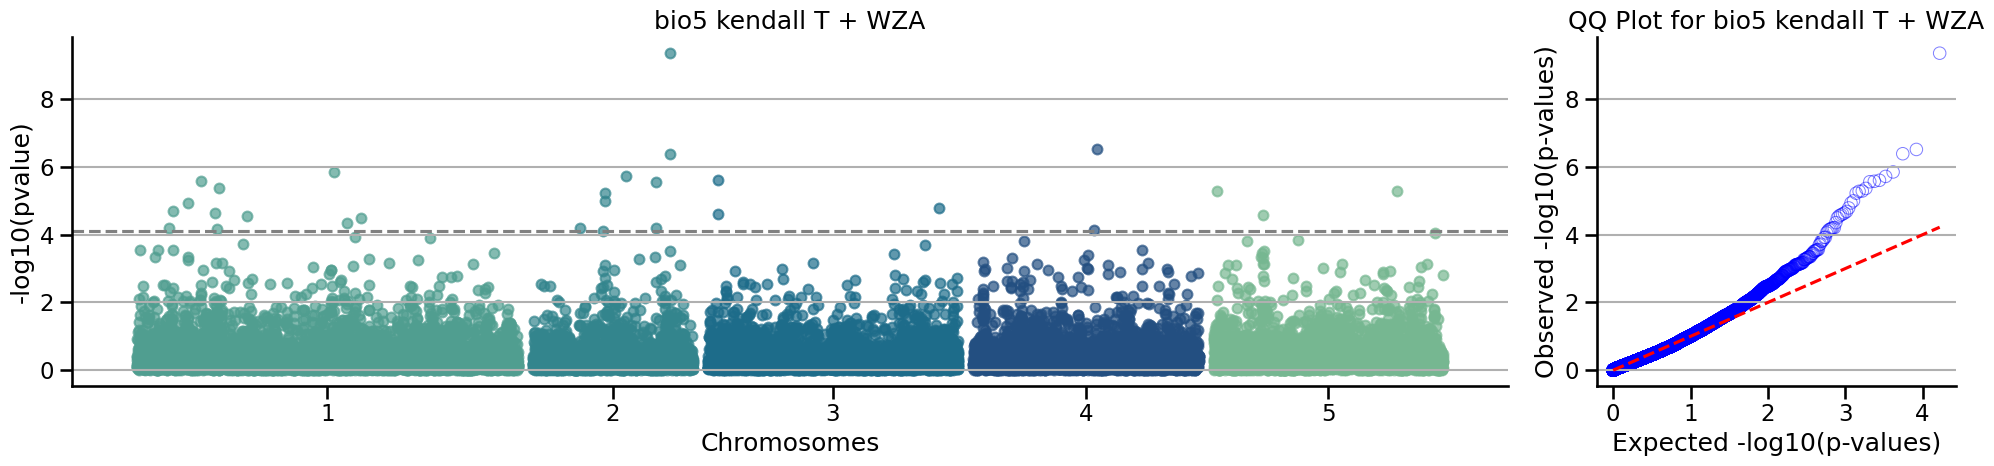

/tmp/ipykernel_1982176/313494684.py:49: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax1.scatter(


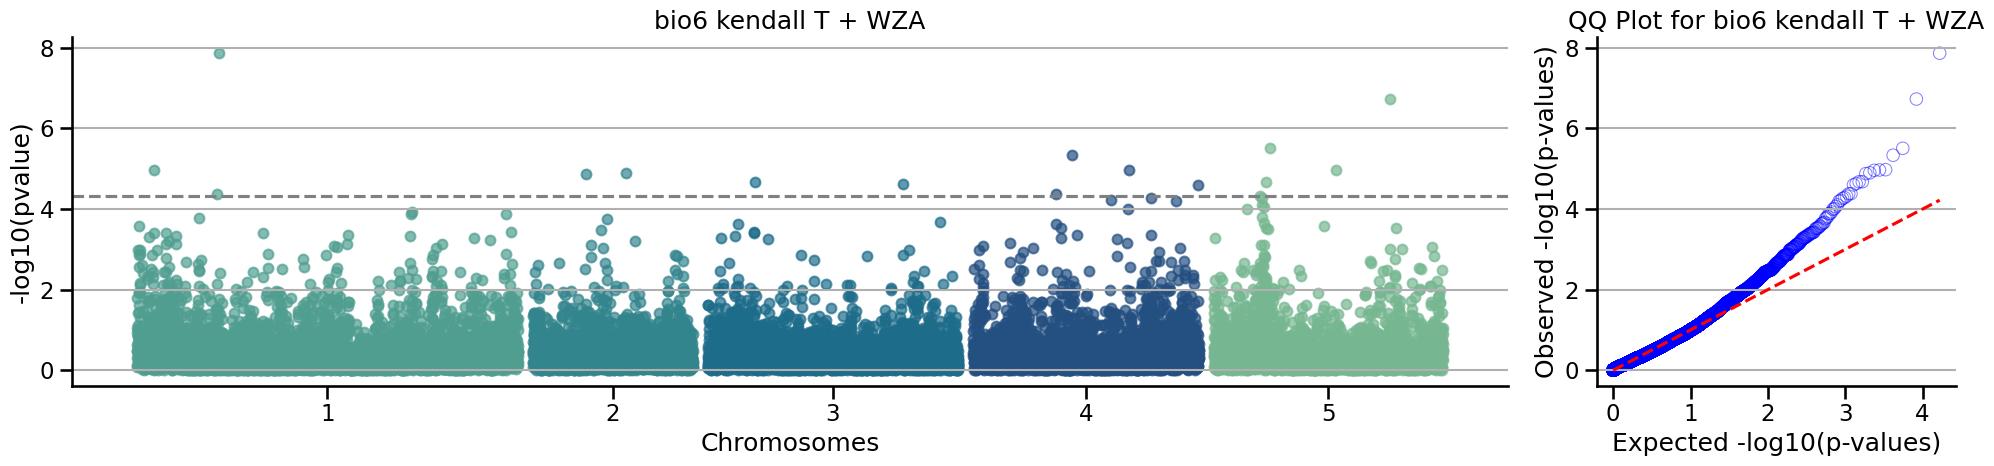

/tmp/ipykernel_1982176/313494684.py:49: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax1.scatter(


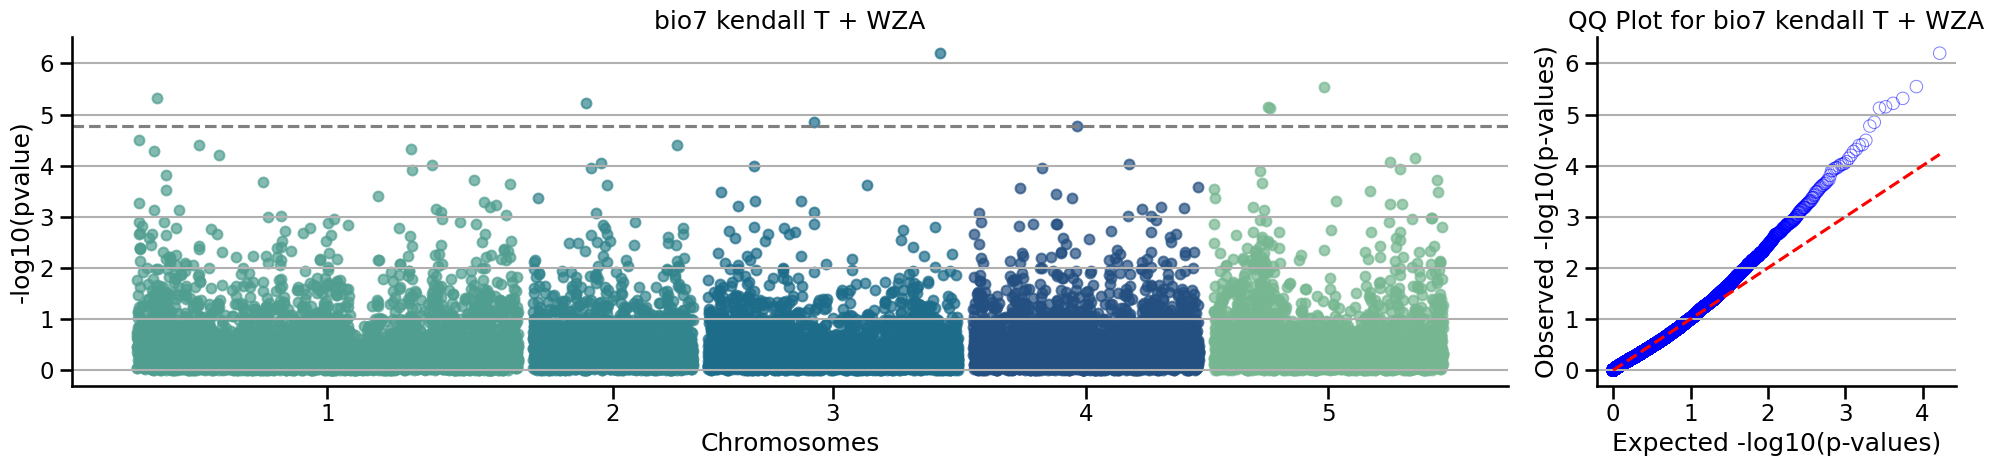

/tmp/ipykernel_1982176/313494684.py:49: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax1.scatter(


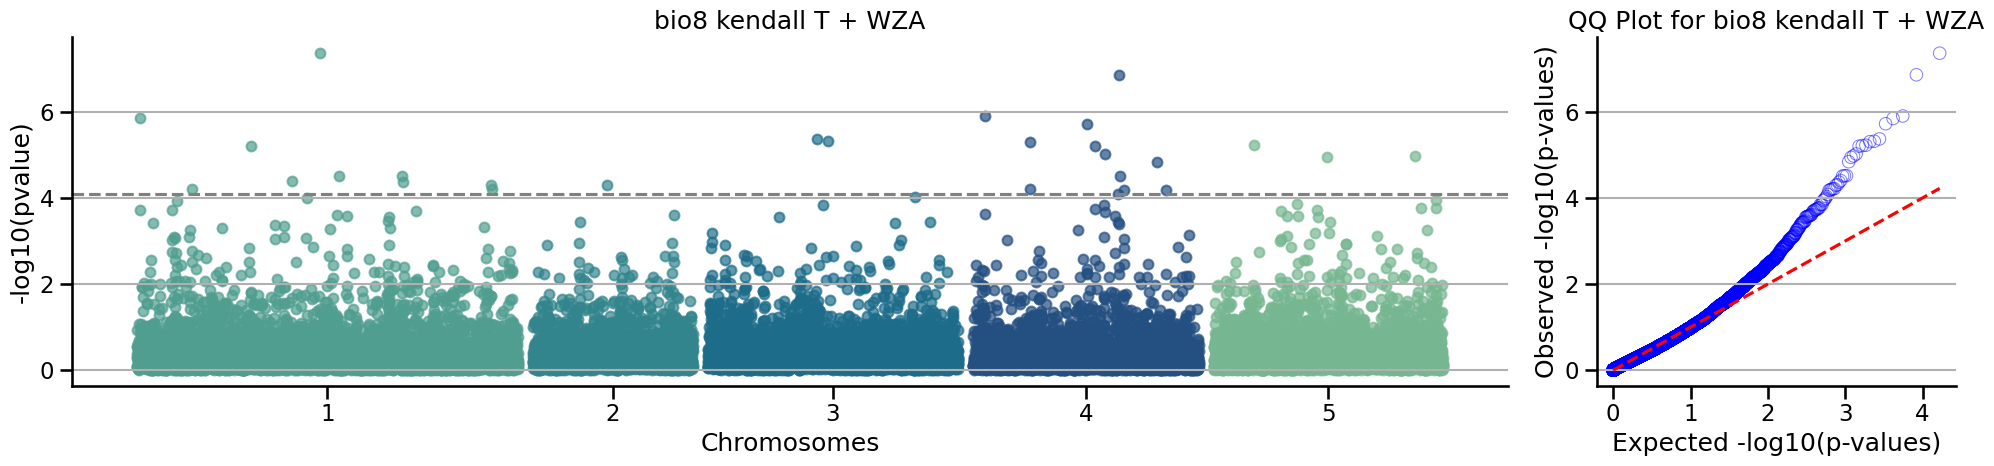

/tmp/ipykernel_1982176/313494684.py:49: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax1.scatter(


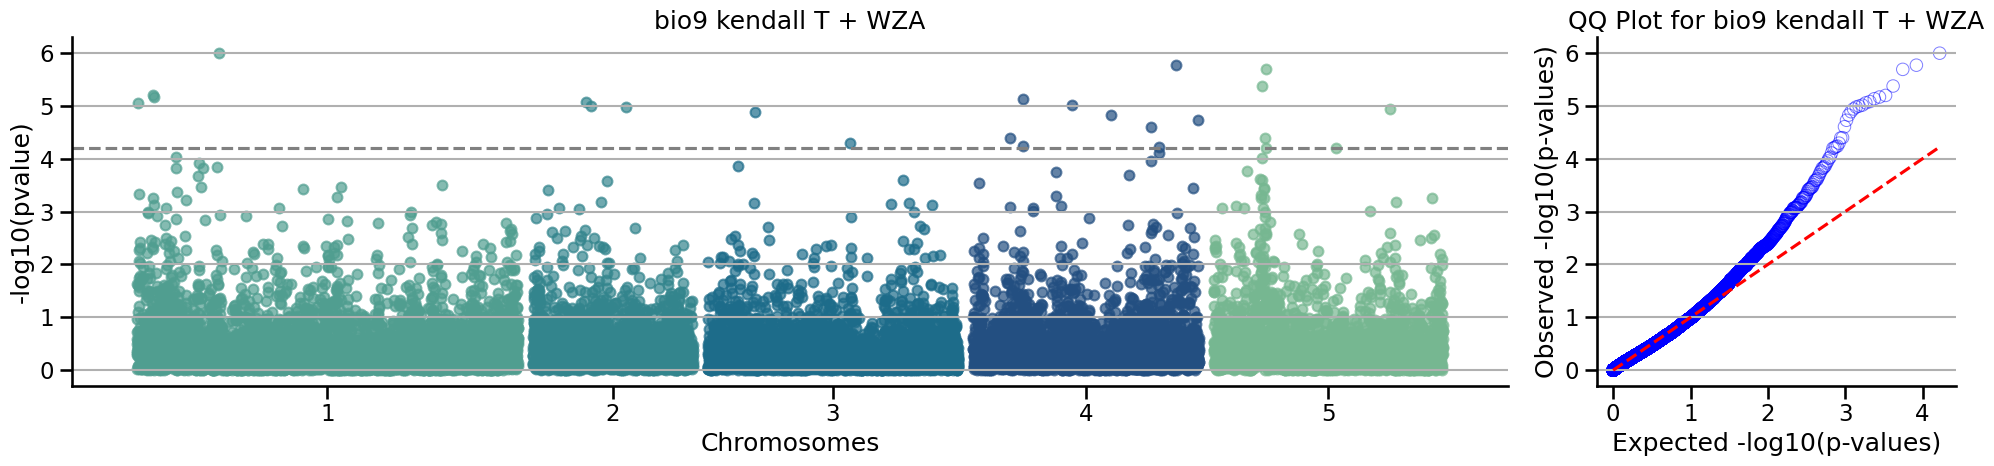

/tmp/ipykernel_1982176/313494684.py:49: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax1.scatter(


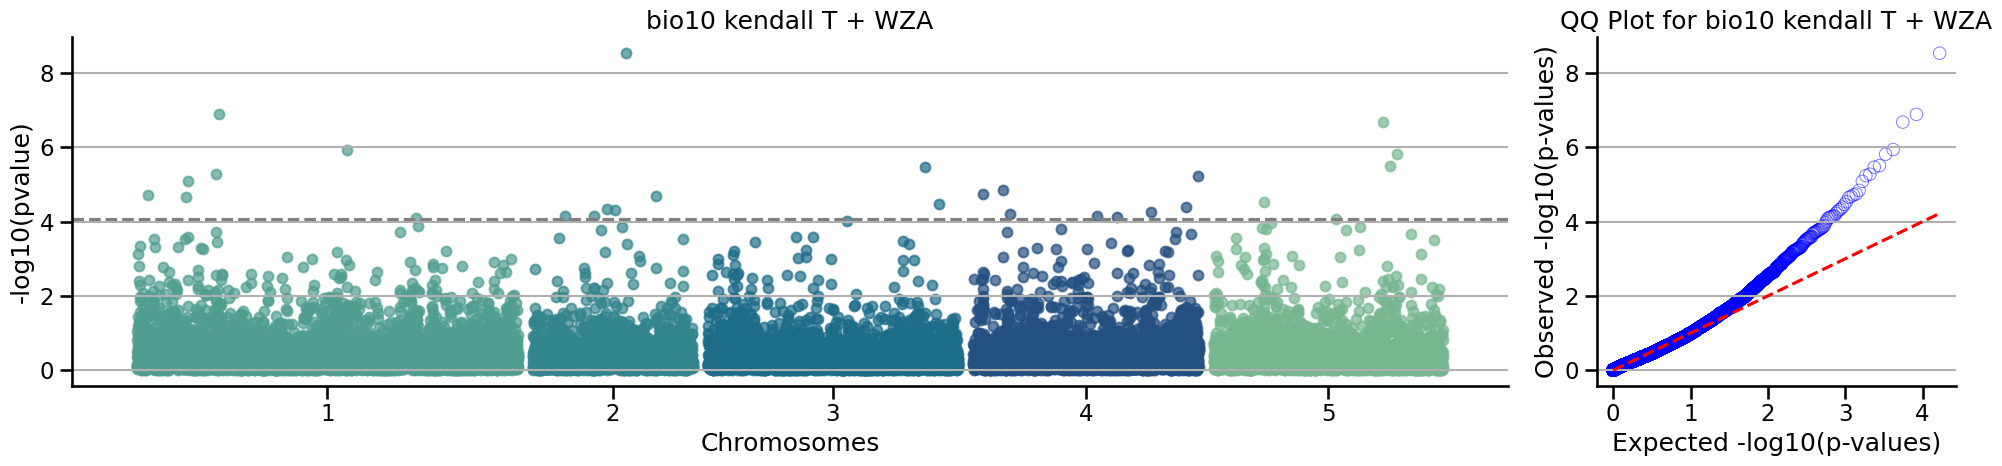

/tmp/ipykernel_1982176/313494684.py:49: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax1.scatter(


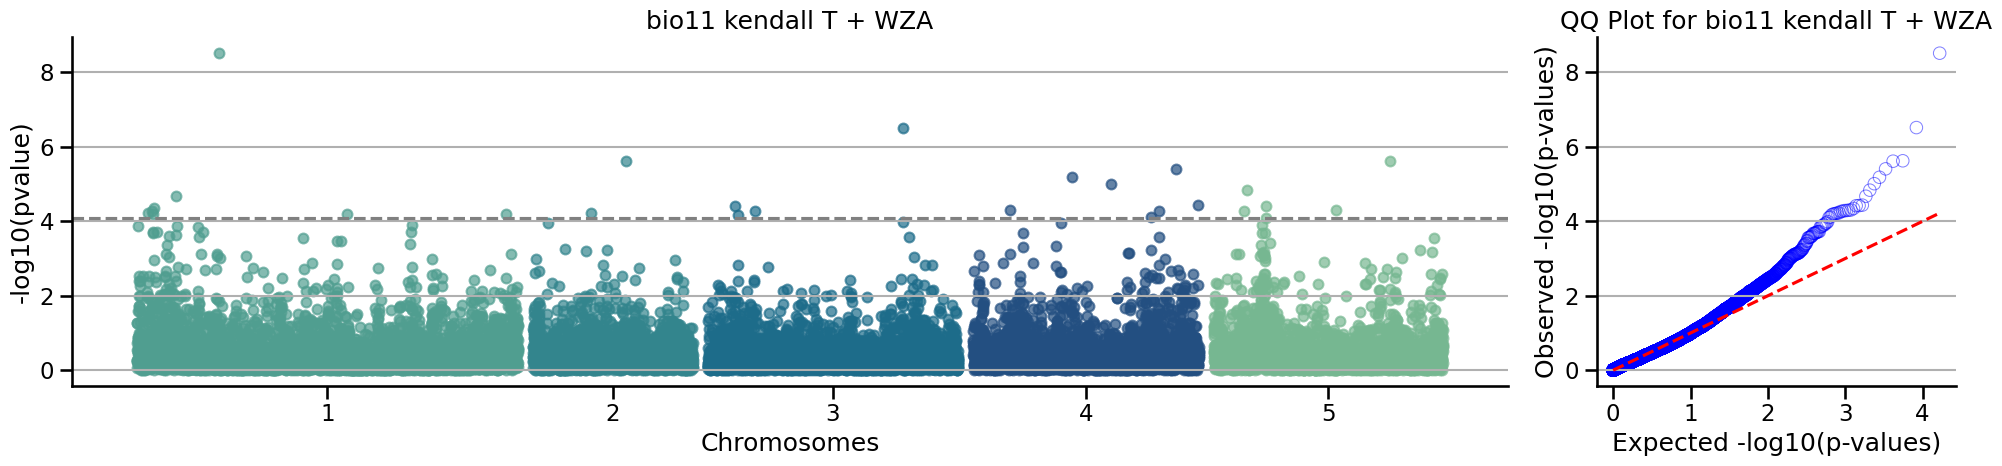

/tmp/ipykernel_1982176/313494684.py:49: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax1.scatter(


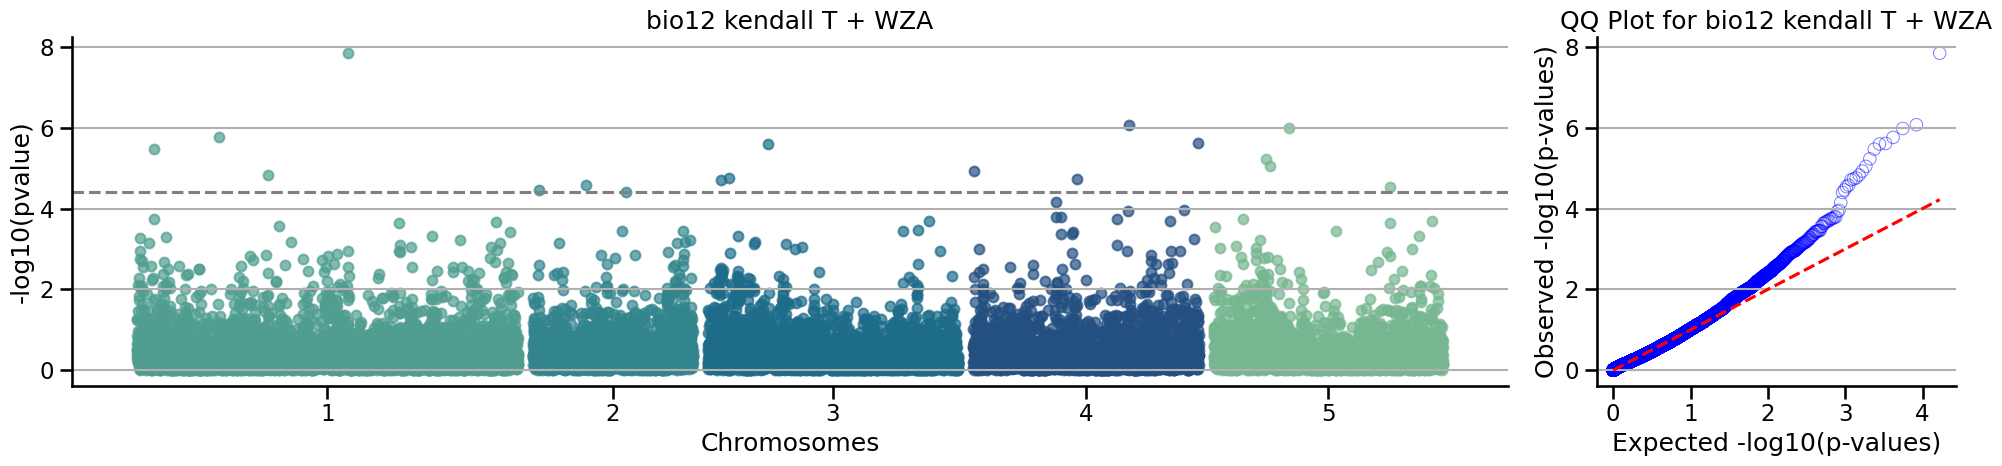

/tmp/ipykernel_1982176/313494684.py:49: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax1.scatter(


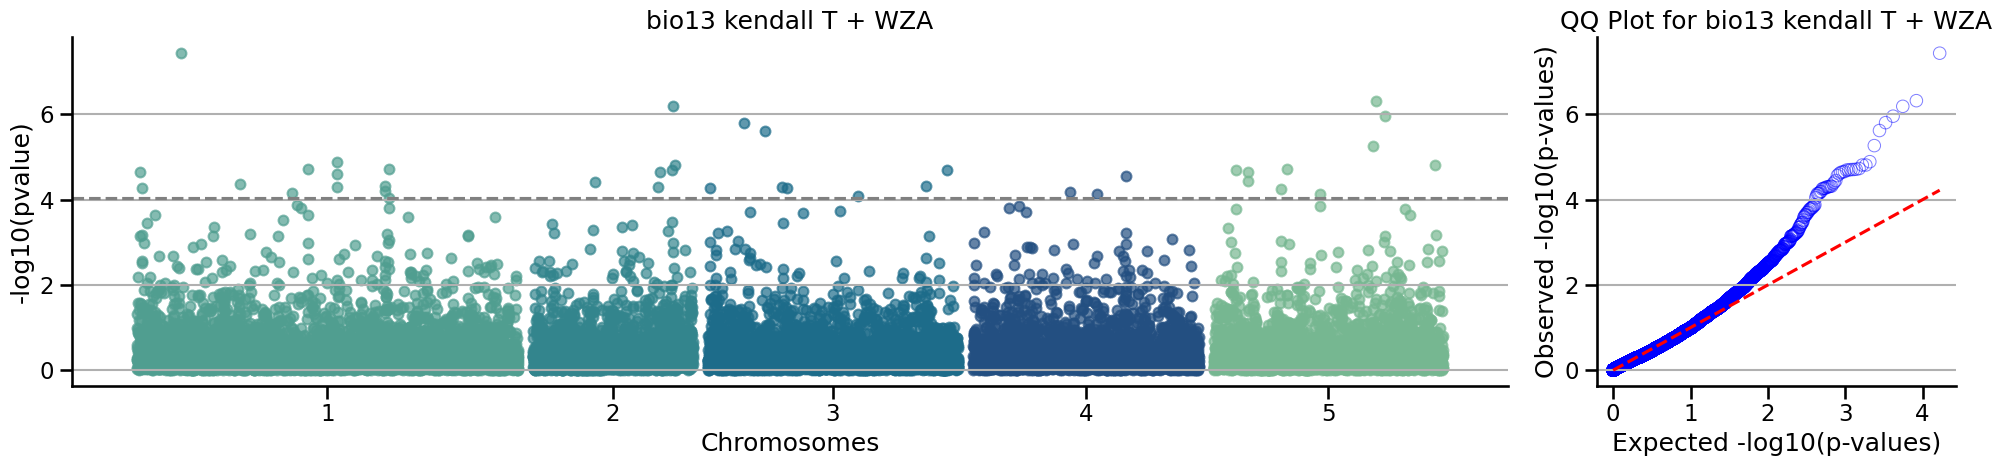

/tmp/ipykernel_1982176/313494684.py:49: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax1.scatter(


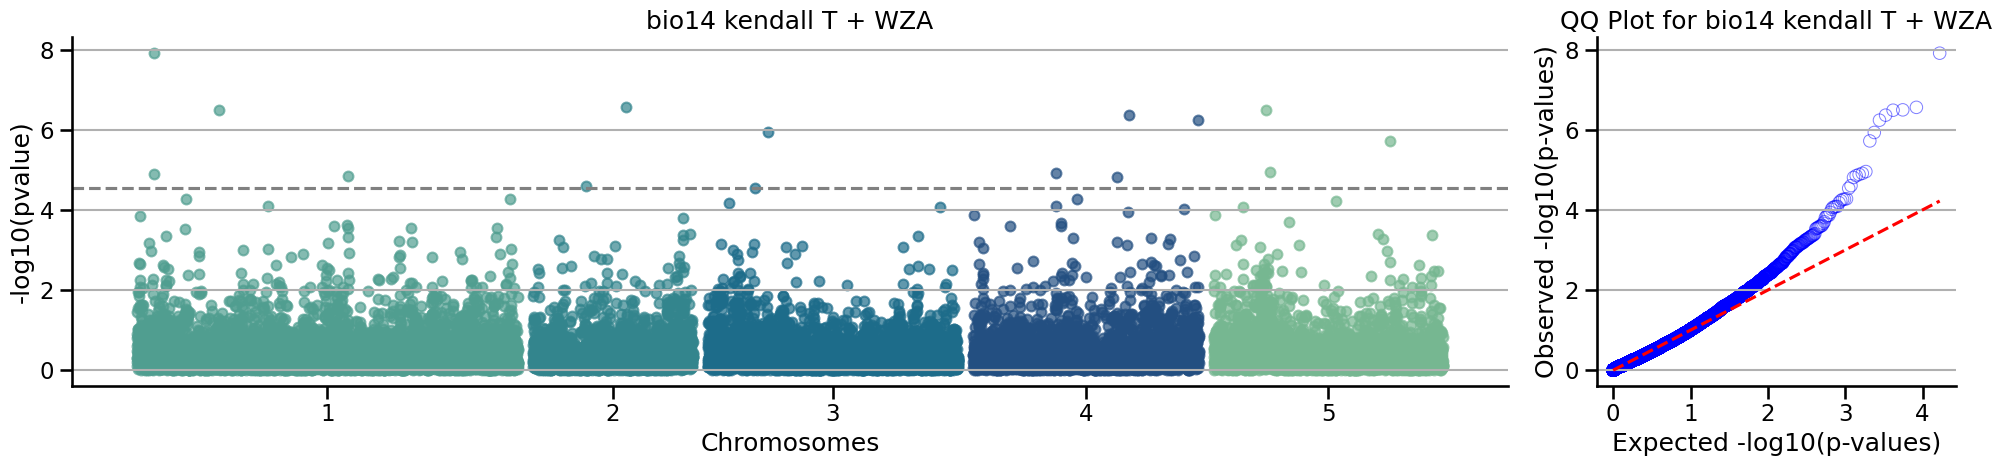

/tmp/ipykernel_1982176/313494684.py:49: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax1.scatter(


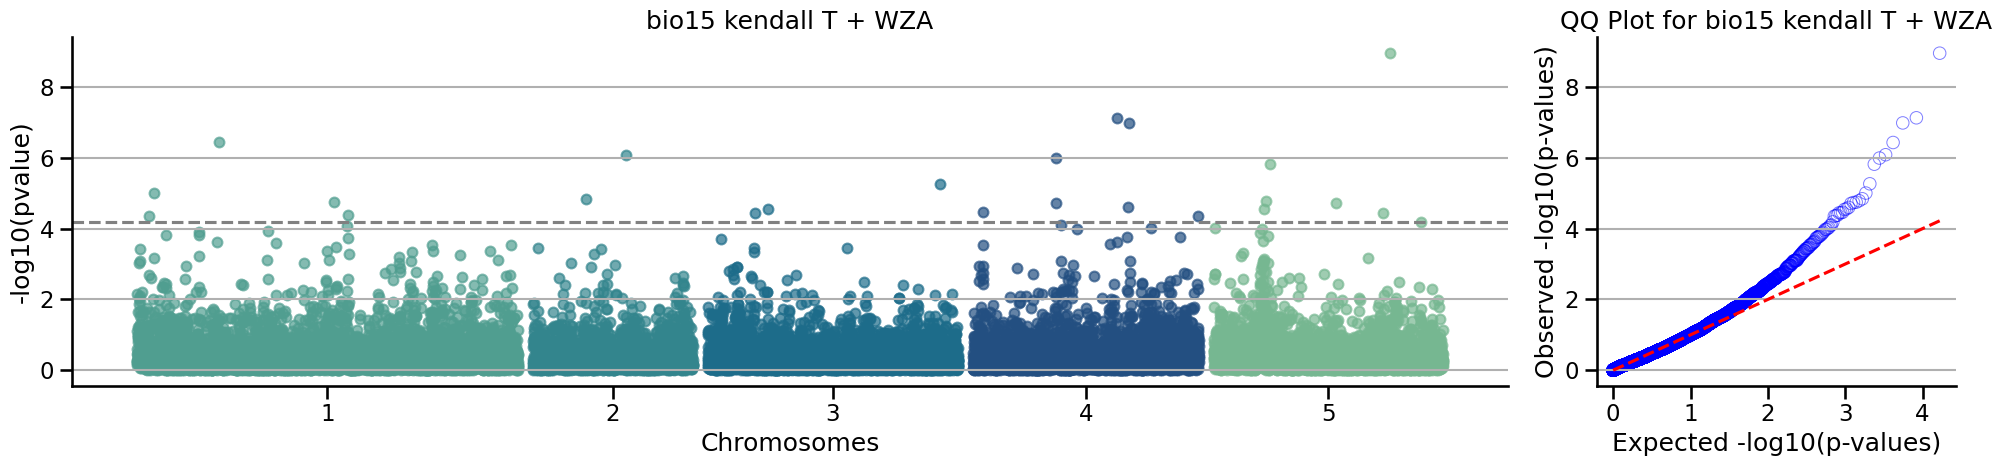

/tmp/ipykernel_1982176/313494684.py:49: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax1.scatter(


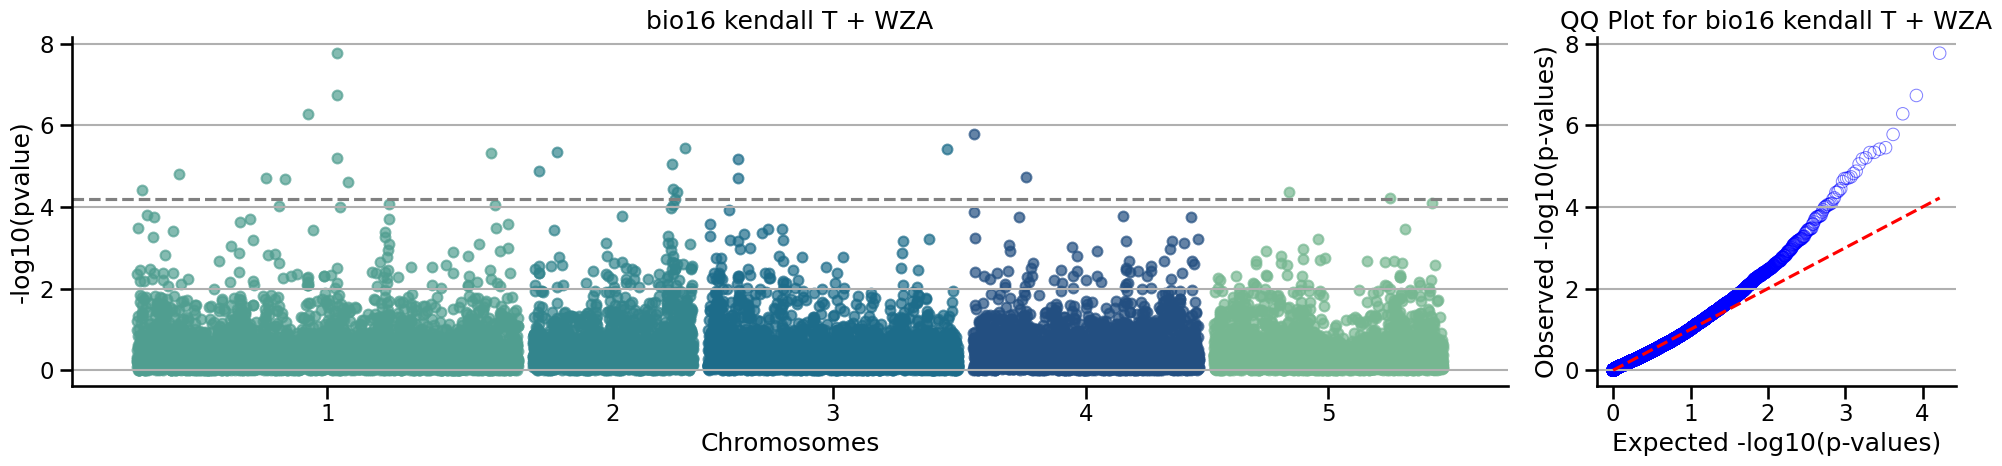

/tmp/ipykernel_1982176/313494684.py:49: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax1.scatter(


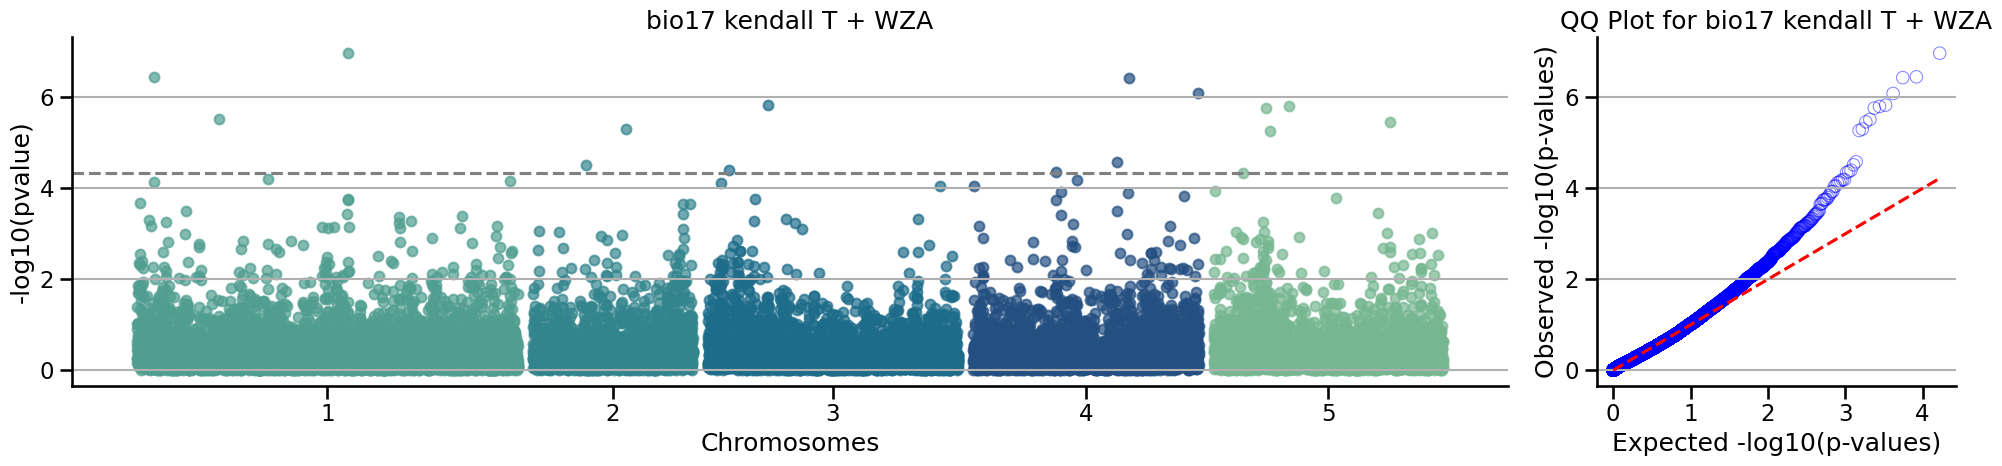

/tmp/ipykernel_1982176/313494684.py:49: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax1.scatter(


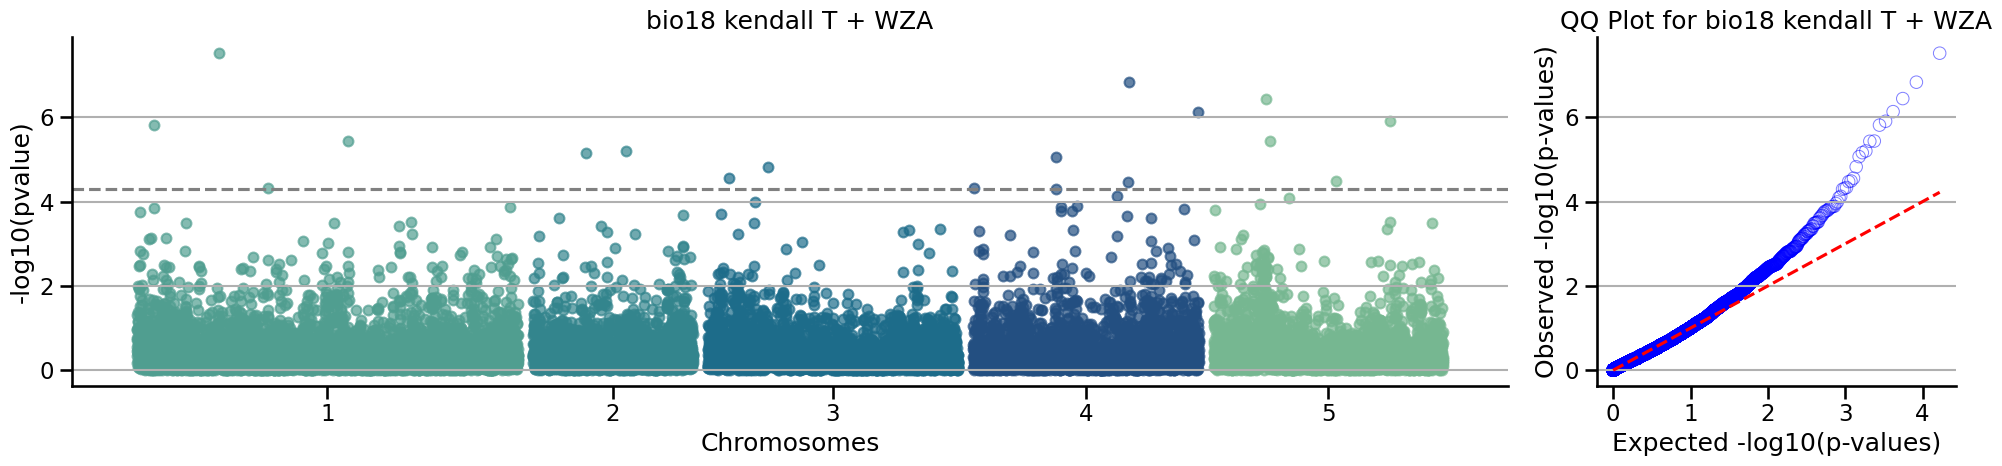

/tmp/ipykernel_1982176/313494684.py:49: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax1.scatter(


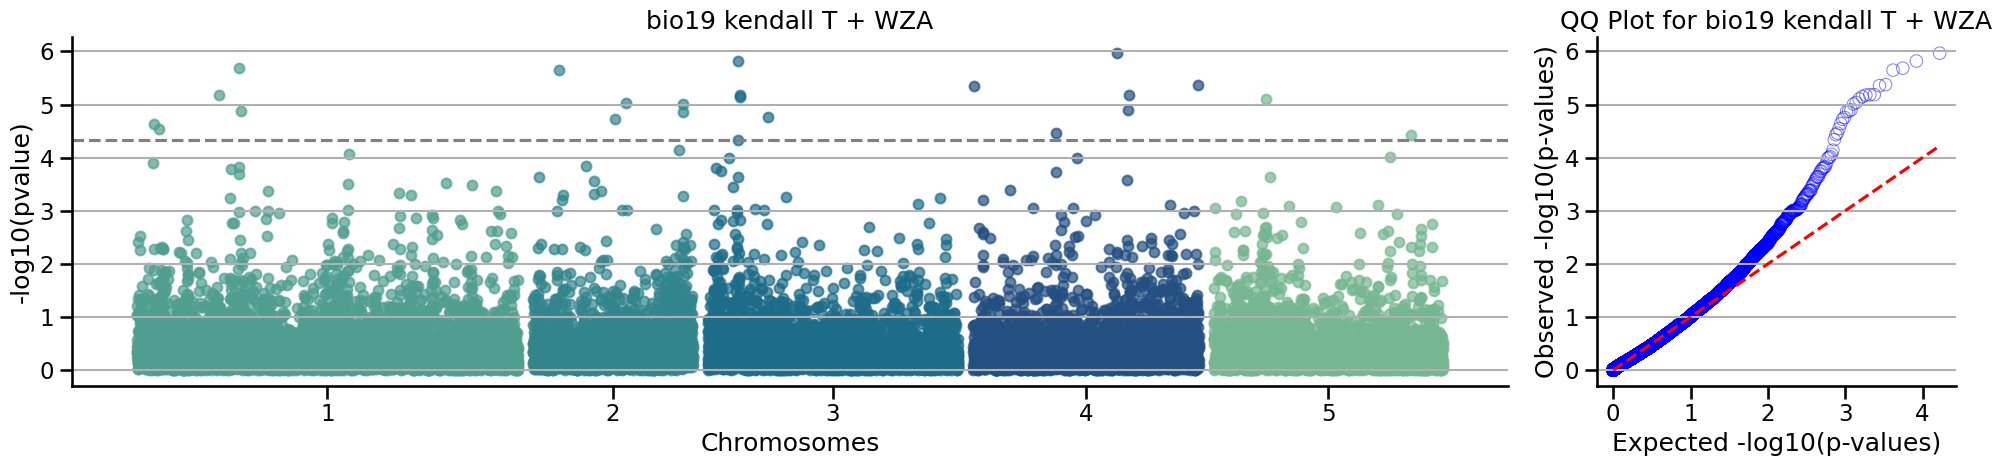

In [24]:
for biovar in biovars:
    wza = pd.read_csv(f'wza_kendalltau_results_{biovar}_poly7.csv')

    wza['chrom'] = wza['gene'].str.split('_').str[0].astype(int)
    wza['pos'] = wza['gene'].str.split('_').str[1].astype(int)
    # Assuming 'wza' and 'biovar' are defined and properly set up as needed for your plots
    # Data preparation and calculations
    observed_quantiles = -np.log10(np.sort(wza['Z_pVal'].values))
    expected_quantiles = -np.log10(np.linspace(1 / len(wza), 1, len(wza)))
    #threshold_value = 0.05 / len(wza)
    # Apply Benjamini-Hochberg correction and find critical p-value
    _, adjusted_pvals, _, _ = multipletests(wza['Z_pVal'], alpha=0.05, method='fdr_bh')
    wza['adjusted_pval'] = adjusted_pvals

    # Find the largest raw p-value that corresponds to an adjusted p-value less than or equal to the FDR threshold
    critical_pvalue = wza.loc[wza['adjusted_pval'] <= 0.05, 'Z_pVal'].max()
    #significance_line = all[all['Bonferroni_corrected_pval'] < 0.05]['-log10(pvalue)'].min()
    # DataFrame setup for the Manhattan plot
    df = wza[['Z_pVal', 'pos', 'chrom']].copy()
    df['chromosome'] = df['chrom']
    df['position'] = df['pos']
    df['-log10(pvalue)'] = -np.log10(df['Z_pVal'])
    
    # Color setup
    colors = sns.color_palette("crest", n_colors=5)
    
    # Calculate chromosome offsets as before
    chromosome_offsets = {}
    offset = 0
    chrom_ends = {}
    for chrom in sorted(wza['chrom'].unique()):
        chromosome_offsets[chrom] = offset
        max_position = wza[wza['chrom'] == chrom]['pos'].max()
        offset += max_position + 200
        chrom_ends[offset] = (chrom, max_position)
    
    # Plotting as before
    # ...
    df['adjusted_position'] = df.apply(lambda row: row['position'] + chromosome_offsets[row['chromosome']], axis=1)
    
    # Create a figure with custom subplot widths
    fig = plt.figure(figsize=(20, 5))
    gs = gridspec.GridSpec(1, 2, width_ratios=[4, 1])  # 80% to 20% width ratio
    
    # Manhattan plot on the first subplot
    ax1 = plt.subplot(gs[0])
    for chrom in sorted(df['chromosome'].unique()):
        subset = df[df['chromosome'] == chrom]
        ax1.scatter(
            subset['adjusted_position'],
            subset['-log10(pvalue)'],
            alpha=0.7,
            c=colors[chrom % len(colors)],
            s=50
        )
    
    ax1.set_xlabel('Chromosomes')
    ax1.set_ylabel('-log10(pvalue)')
    ax1.set_title(f'{biovar} kendall T + WZA')

    ax1.axhline(y=-np.log10(critical_pvalue), color='grey', linestyle='dashed')

    #ax1.axhline(y=-np.log10(threshold_value), color='grey', linestyle='dashed')
    ax1.spines['right'].set_visible(False)
    ax1.spines['top'].set_visible(False)
    ax1.grid(axis='y')
    
    # QQ plot on the second subplot
    ax2 = plt.subplot(gs[1])
    sns.scatterplot(x=expected_quantiles, y=observed_quantiles, edgecolor='b', facecolor='none', alpha=0.5, ax=ax2)
    ax2.plot([min(expected_quantiles), max(expected_quantiles)], [min(expected_quantiles), max(expected_quantiles)], 'r--')
    ax2.set_xlabel("Expected -log10(p-values)")
    ax2.set_ylabel("Observed -log10(p-values)")
    ax2.set_title(f'QQ Plot for {biovar} kendall T + WZA')
    ax2.spines['right'].set_visible(False)
    ax2.spines['top'].set_visible(False)
    ax2.grid(axis='y')
        
    # Custom function to determine actual genomic positions from adjusted positions
    def get_original_position(adjusted_pos):
        for end in sorted(chrom_ends.keys()):
            if adjusted_pos <= end:
                chrom, max_pos = chrom_ends[end]
                return f"{chrom}"
        return ""
    
    # Setting the ticks on the Manhattan plot to show actual genomic positions
    ax1.set_xticks([chromosome_offsets[chrom] + wza[wza['chrom'] == chrom]['pos'].max()/2 for chrom in sorted(wza['chrom'].unique())])  # Set ticks at the middle of each chromosome segment
    ax1.set_xticklabels([get_original_position(chromosome_offsets[chrom] + wza[wza['chrom'] == chrom]['pos'].max()/2) for chrom in sorted(wza['chrom'].unique())],)  # Use the function to get original positions as labels
    
    plt.tight_layout()
    plt.savefig(f'last_gen_{biovar}_kendallWZA.png')
    plt.show()

/tmp/ipykernel_1115481/1203503381.py:38: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(


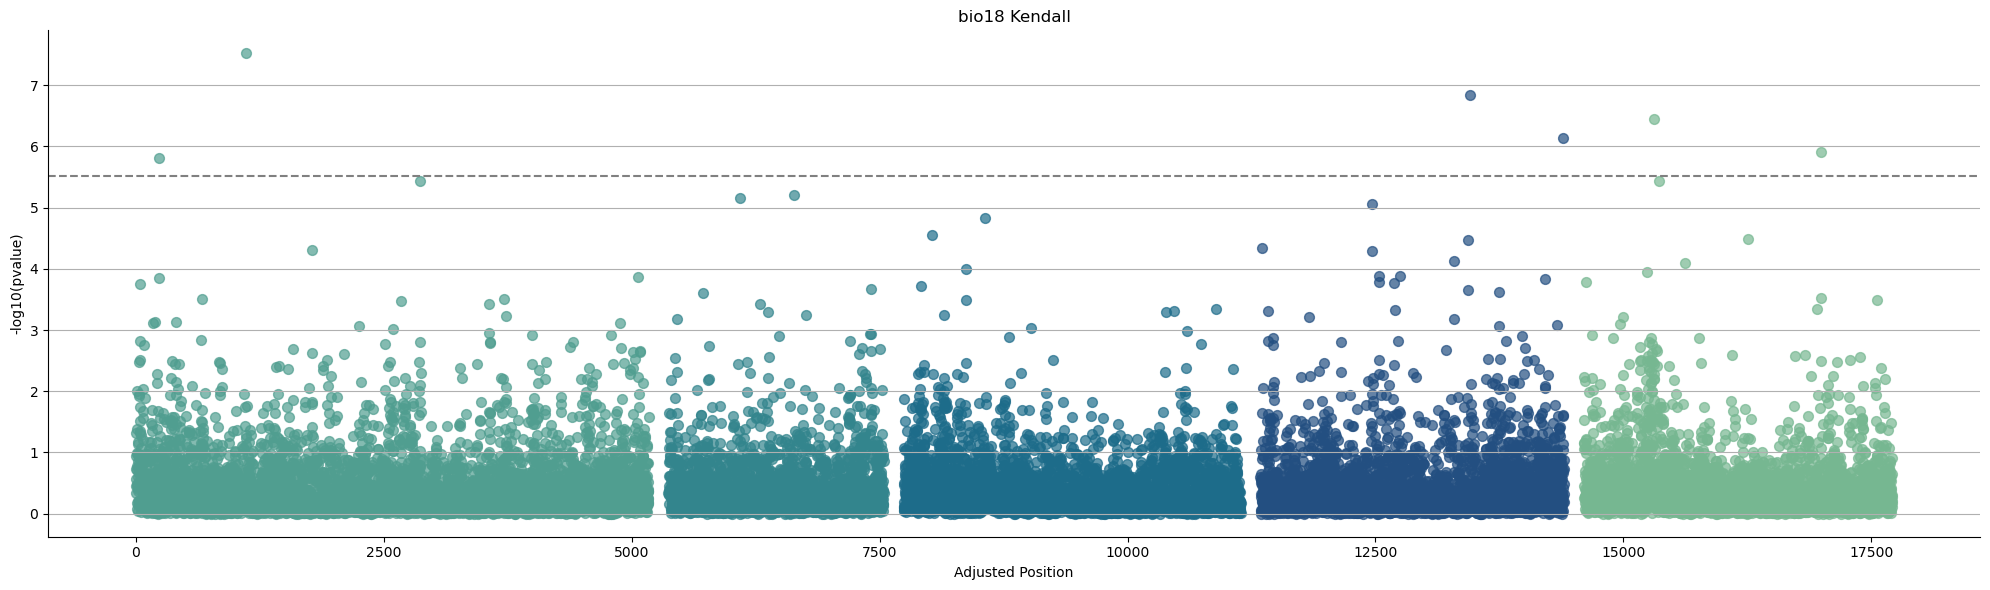

In [20]:
threshold_value = 0.05 / len(wza)
#sm.qqplot(pvalues['pvalue'], line ='45') 
#py.show() 

df = wza[['Z_pVal','pos','chrom']].copy()


# Parsing chromosome number and position
df['chromosome'] = df['chrom']
df['position'] = df['pos']
df['-log10(pvalue)'] = -np.log10(df['Z_pVal'])

colors = sns.color_palette("crest", n_colors = 5)

# Calculate the offset for each chromosome to prevent overlap
chromosome_offsets = {}
offset = 0
for chrom in sorted(df['chromosome'].unique()):
    chromosome_offsets[chrom] = offset
    max_position = df[df['chromosome'] == chrom]['position'].max()
    offset += max_position + 200  # Buffer to prevent overlap

# Apply offsets to positions
df['adjusted_position'] = df.apply(lambda row: row['position'] + chromosome_offsets[row['chromosome']], axis=1)

# Normalize sizes for better visualization
size_transform = 2  # Adjust this factor as needed


# Create a color map based on `n_est`
#df['color'] = df['n_est'].map(lambda x: cmap(norm(x)))

# Creating the Manhattan plot
plt.figure(figsize=(20, 6))

for chrom in sorted(df['chromosome'].unique()):
    subset = df[df['chromosome'] == chrom]
    plt.scatter(
        subset['adjusted_position'],
        subset['-log10(pvalue)'],
        alpha=0.7,  # Transparency for better visibility
        c=colors[chrom % len(colors)], 
        label=f'Chr {chrom}',
            s= 50)

# Aesthetics
plt.xlabel('Adjusted Position')
plt.ylabel('-log10(pvalue)')
plt.title(f'{biovar} Kendall')

ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.grid(axis='y')



# Create a legend for the number of estimated lineages
#handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=cmap(norm(n)), markersize=10, label=f'Lineages {n}') for n in sorted(n_est_unique)]
#plt.legend(handles=handles, title="Estimated Lineages", bbox_to_anchor=(1.05, 1), loc='upper left')

# Threshold line
threshold = -np.log10(threshold_value)
plt.axhline(y=threshold, color='grey', linestyle='dashed')

# Show the plot
plt.tight_layout()

plt.savefig(f'manhattan_{biovar}_kendall.pdf')
plt.savefig(f'manhattan_{biovar}_kendall.png',dpi=600)
plt.show()


In [ ]:
#genes = ['2_199', '3_2730', '5_2244']
genes = ['2_1265']
# Add circles around the specific genes
for gene in genes:
    chrom, pos = map(int, gene.split('_'))
    subset_gene = df[(df['chromosome'] == chrom) & (df['position'] == pos)]
    if not subset_gene.empty:
        plt.scatter(
            subset_gene['adjusted_position'],
            subset_gene['-log10(pvalue)'],
            edgecolor='red',  # Color of the edge of the circle
            linewidth=2,      # Width of the edge line
            facecolor='none', # Facecolor of the circle (None means transparent)
            s=100,            # Size of the circle
            label=f'Gene {gene}'
        )

In [ ]:
#genes = ['2_199', '3_2730', '5_2244']
genes = ['2_1265', '4_801']
# Add circles around the specific genes
for gene in genes:
    chrom, pos = map(int, gene.split('_'))
    subset_gene = df[(df['chromosome'] == chrom) & (df['position'] == pos)]
    if not subset_gene.empty:
        plt.scatter(
            subset_gene['adjusted_position'],
            subset_gene['-log10(pvalue)'],
            edgecolor='red',  # Color of the edge of the circle
            linewidth=2,      # Width of the edge line
            facecolor='none', # Facecolor of the circle (None means transparent)
            s=100,            # Size of the circle
            label=f'Gene {gene}'
        )

/tmp/ipykernel_3175312/1489910986.py:31: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(subset['adjusted_position'], subset['-log10(pvalue)'], c=colors[chrom % len(colors)], label=f'Chr {chrom}', s=10)


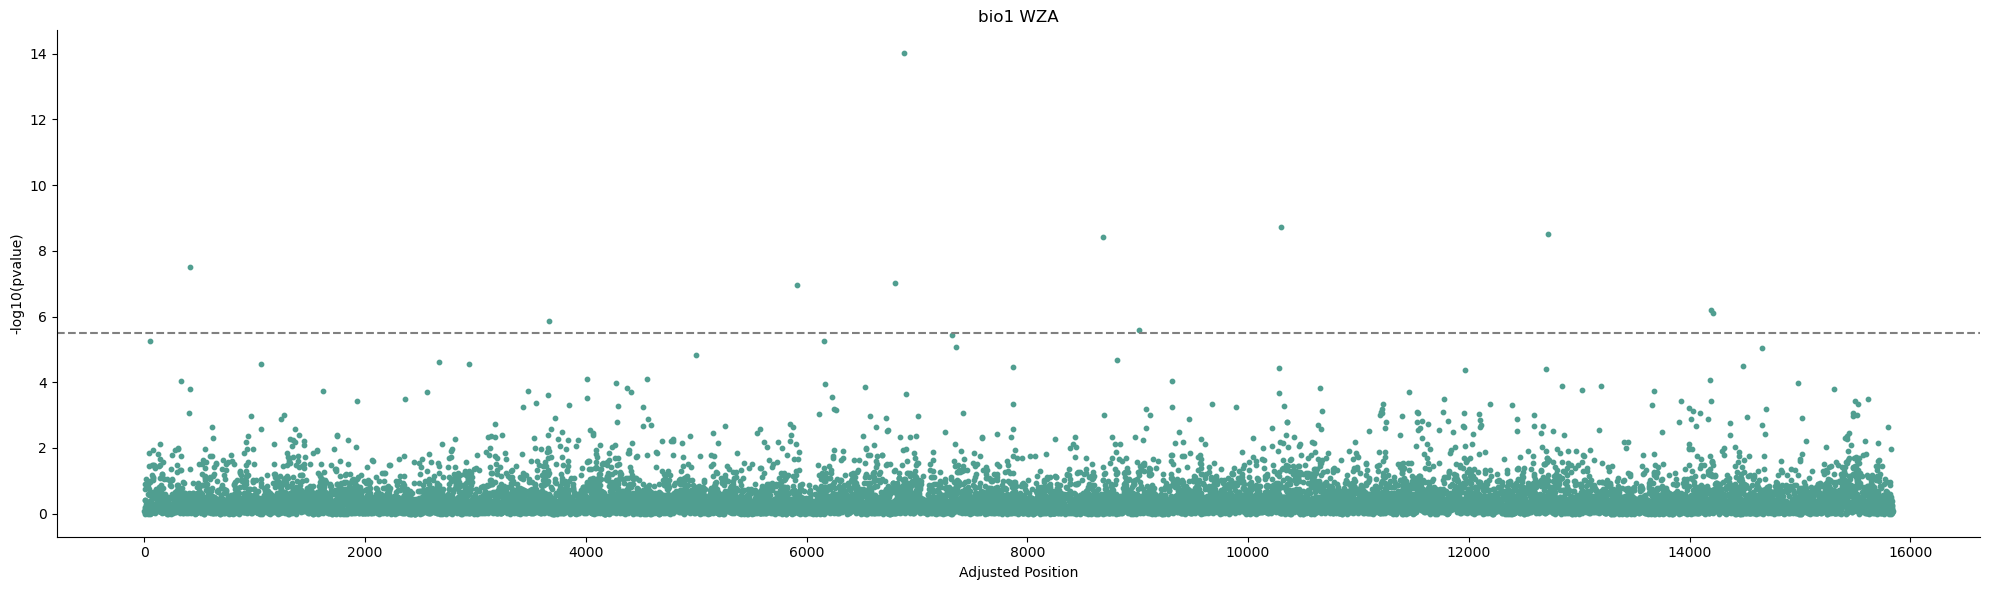

In [54]:
threshold_value = 0.05 / len(wza)
biovar='bio1'
#sm.qqplot(pvalues['pvalue'], line ='45') 
#py.show() 

df = wza[['Z_pVal', 'index']].copy()

colors = sns.color_palette("crest", n_colors = 5)

# Parsing chromosome number and position
df['chromosome'] = 1
df['position'] = df['index']
df['-log10(pvalue)'] = -np.log10(df['Z_pVal'])

# Calculate the offset for each chromosome to prevent overlap
chromosome_offsets = {}
offset = 0
for chrom in sorted(df['chromosome'].unique()):
    chromosome_offsets[chrom] = offset
    max_position = df[df['chromosome'] == chrom]['position'].max()
    offset += max_position + 1000000  # Adding 1 million as a buffer between chromosomes

# Apply offsets to positions
df['adjusted_position'] = df.apply(lambda row: row['position'] + chromosome_offsets[row['chromosome']], axis=1)

# Creating the Manhattan plot
plt.figure(figsize=(20, 6))

for chrom in sorted(df['chromosome'].unique()):
    subset = df[df['chromosome'] == chrom]
    plt.scatter(subset['adjusted_position'], subset['-log10(pvalue)'], c=colors[chrom % len(colors)], label=f'Chr {chrom}', s=10)

# Aesthetics
plt.xlabel('Adjusted Position')
plt.ylabel('-log10(pvalue)')
#plt.title('Manhattan Plot')
#plt.grid(axis='y')
#plt.legend(title="Chromosome", bbox_to_anchor=(1.05, 1), loc='upper left')
ax = plt.gca()  # Get current axes
ax.spines['top'].set_visible(False)  # Remove the top spine
ax.spines['right'].set_visible(False)
# Threshold line (optional)
threshold = -np.log10(threshold_value)
plt.axhline(y=threshold, color='grey', linestyle='dashed')
plt.title(f'{biovar} WZA')  # Set the title

# Show the plot
plt.tight_layout()
#plt.savefig(f'manhattan_{biovar}.png')
plt.show()

/tmp/ipykernel_3175312/2368688080.py:31: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(subset['adjusted_position'], subset['-log10(pvalue)'], c=colors[chrom % len(colors)], label=f'Chr {chrom}', s=10)


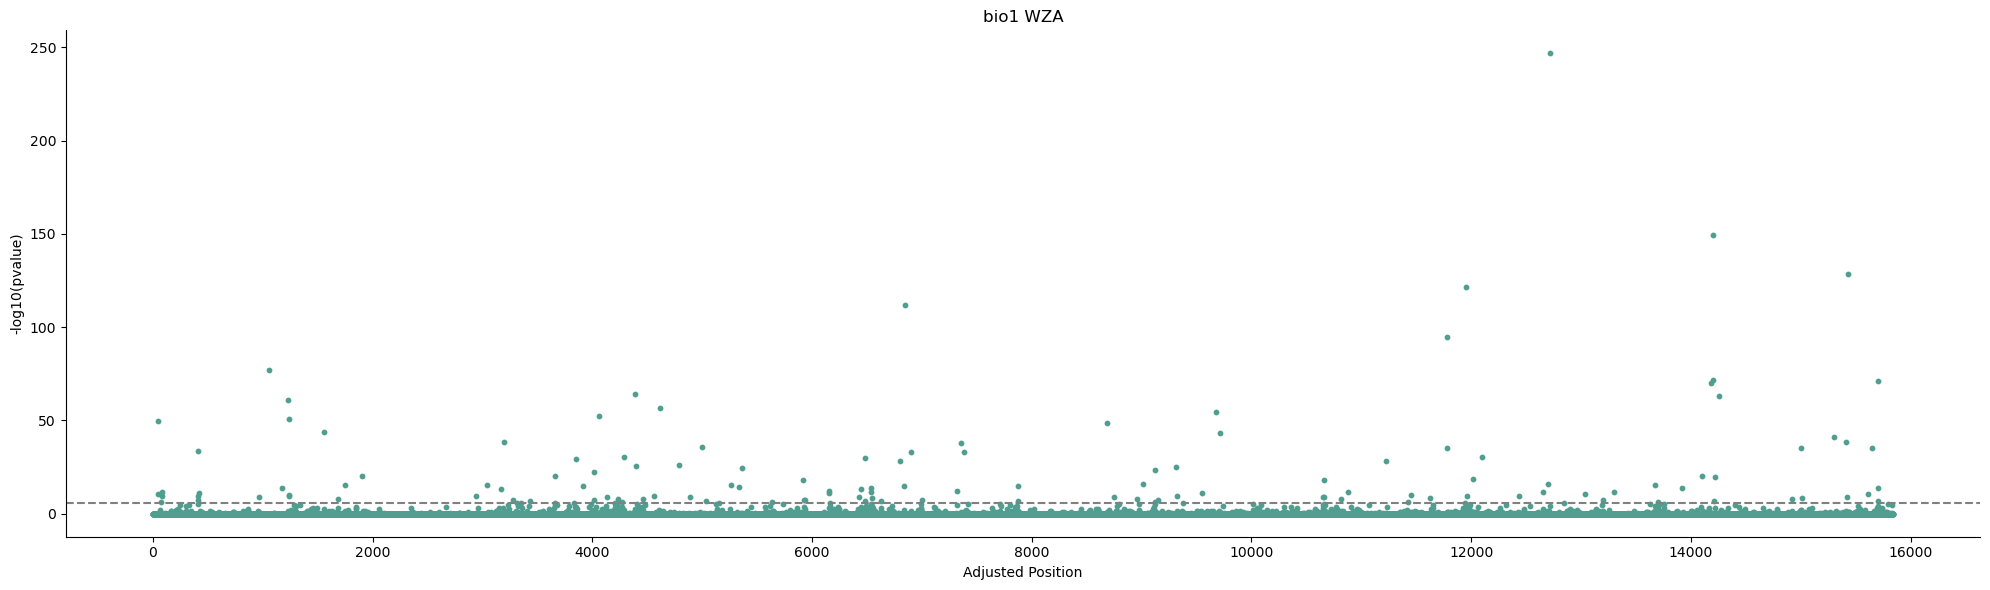

In [50]:
threshold_value = 0.05 / len(wza)
biovar='bio1'
#sm.qqplot(pvalues['pvalue'], line ='45') 
#py.show() 

df = wza[['top_candidate_p', 'index']].copy()

colors = sns.color_palette("crest", n_colors = 5)

# Parsing chromosome number and position
df['chromosome'] = 1
df['position'] = df['index']
df['-log10(pvalue)'] = -np.log10(df['top_candidate_p'])

# Calculate the offset for each chromosome to prevent overlap
chromosome_offsets = {}
offset = 0
for chrom in sorted(df['chromosome'].unique()):
    chromosome_offsets[chrom] = offset
    max_position = df[df['chromosome'] == chrom]['position'].max()
    offset += max_position + 1000000  # Adding 1 million as a buffer between chromosomes

# Apply offsets to positions
df['adjusted_position'] = df.apply(lambda row: row['position'] + chromosome_offsets[row['chromosome']], axis=1)

# Creating the Manhattan plot
plt.figure(figsize=(20, 6))

for chrom in sorted(df['chromosome'].unique()):
    subset = df[df['chromosome'] == chrom]
    plt.scatter(subset['adjusted_position'], subset['-log10(pvalue)'], c=colors[chrom % len(colors)], label=f'Chr {chrom}', s=10)

# Aesthetics
plt.xlabel('Adjusted Position')
plt.ylabel('-log10(pvalue)')
#plt.title('Manhattan Plot')
#plt.grid(axis='y')
#plt.legend(title="Chromosome", bbox_to_anchor=(1.05, 1), loc='upper left')
ax = plt.gca()  # Get current axes
ax.spines['top'].set_visible(False)  # Remove the top spine
ax.spines['right'].set_visible(False)
# Threshold line (optional)
threshold = -np.log10(threshold_value)
plt.axhline(y=threshold, color='grey', linestyle='dashed')
plt.title(f'{biovar} WZA')  # Set the title

# Show the plot
plt.tight_layout()
plt.savefig(f'manhattan_{biovar}.png')
plt.show()